In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [73]:
df=pd.read_csv('data/game_of_thrones_deaths_collecti.csv')
df.head(10)

,name,allegiance,season,episode,location,killer,killers_house,method,death_no
0,Waymar Royce,Night's Watch,1,1,Beyond the Wall,White Walker,NaN,Ice sword,1
1,Gared,Night's Watch,1,1,Beyond the Wall,White Walker,NaN,Ice sword,2
2,Will,Night's Watch,1,1,Winterfell,Ned Stark,House Stark,Sword,3
3,Stag,NaN,1,1,Winterfell,Direwolf,NaN,Teeth,4
4,Direwolf,NaN,1,1,Winterfell,Stag,NaN,Antler,5
5,Jon Arryn,House Arryn,1,1,King's Landing,Lysa Arryn,House Arryn,Poison,6
6,Dothraki man,Dothraki,1,1,Pentos,Dothraki man,Dothraki,Arakh,7
7,Catspaw assassin,NaN,1,2,Winterfell,Summer,House Stark,Teeth,8
8,Mycah,Smallfolk,1,2,Kingsroad,"Sandor ""the Hound"" Clegane",House Lannister,Sword,9
9,Lady,House Stark,1,2,Kingsroad,Ned Stark,House Stark,Knife,10


In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2224 entries, 0 to 2223
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           2224 non-null   object
 1   allegiance     1792 non-null   object
 2   season         2224 non-null   int64 
 3   episode        2224 non-null   int64 
 4   location       2224 non-null   object
 5   killer         2214 non-null   object
 6   killers_house  2194 non-null   object
 7   method         2224 non-null   object
 8   death_no       2224 non-null   int64 
dtypes: int64(3), object(6)
memory usage: 156.5+ KB


In [106]:
df= df.fillna({"allegiance": 'Desconocodo', "killer": 'Desconocido',
    'killers_house': 'Desconocido' })
df.count()

name             2224
allegiance       2224
season           2224
episode          2224
location         2224
killer           2224
killers_house    2224
method           2224
death_no         2224
dtype: int64

In [107]:
df_muertes=df.groupby('season')
df_muertes.describe()

episode                                                 death_no  \
         count      mean       std  min  25%   50%   75%   max    count   
season                                                                    
1         58.0  5.844828  2.627798  1.0  5.0   6.0   8.0  10.0     58.0   
2        130.0  7.461538  2.478290  1.0  6.0   9.0   9.0  10.0    130.0   
3         86.0  7.488372  2.365160  1.0  6.0   9.0   9.0  10.0     86.0   
4        170.0  7.558824  2.504330  1.0  6.0   9.0   9.0  10.0    170.0   
5        158.0  6.651899  2.658785  1.0  4.0   8.0   9.0  10.0    158.0   
6        396.0  8.742424  2.239873  1.0  9.0  10.0  10.0  10.0    396.0   
7        334.0  3.428144  1.392575  1.0  3.0   4.0   4.0   7.0    334.0   
8        892.0  4.886771  0.518528  1.0  5.0   5.0   5.0   6.0    892.0   

                                                                      
          mean         std     min      25%     50%      75%     max  
season                                                                
1         29.5   16.886879     1.0    15.25    29.5    43.75    58.0  
2        123.5   37.671829    59.0    91.25   123.5   155.75   188.0  
3        231.5   24.969982   189.0   210.25   231.5   252.75   274.0  
4        359.5   49.218899   275.0   317.25   359.5   401.75   444.0  
5        523.5   45.754781   445.0   484.25   523.5   562.75   602.0  
6        800.5  114.459600   603.0   701.75   800.5   899.25   998.0  
7       1165.5   96.561725   999.0  1082.25  1165.5  1248.75  1332.0  
8       1778.5  257.642517  1333.0  1555.75  1778.5  2001.25  2224.0

In [77]:
total_muertes=df.shape[0]
muertes_temp1=df[df.season==1].shape[0]
muertes_temp2=df[df.season==2].shape[0]
print('Total de muertes:', total_muertes)
print('Muertes en la temporada 1:', muertes_temp1)
print('Muertes en la temporada 2:', muertes_temp2)

Total de muertes: 2224
Muertes en la temporada 1: 58
Muertes en la temporada 2: 130


In [78]:
impacto_tem1=round((muertes_temp1/total_muertes)*100,2)
print('Porcentaje de muertes en la temporada 1:', impacto_tem1)

Porcentaje de muertes en la temporada 1: 2.61


In [79]:
muertes_temp3=df[df.season==3].shape[0]
impacto_tem2=round((muertes_temp2/total_muertes)*100,2)
impacto_tem3=round((muertes_temp3/total_muertes)*100,2)

In [80]:
data={'Temporada':['Temporada 1','Temporada 2'
    ,'Temporada 3']
    ,'Impacto':[impacto_tem1,impacto_tem2,impacto_tem3 ]}
df_impacto=pd.DataFrame.from_dict(data)
df_impacto


,Temporada,Impacto
0,Temporada 1,2.61
1,Temporada 2,5.85
2,Temporada 3,3.87


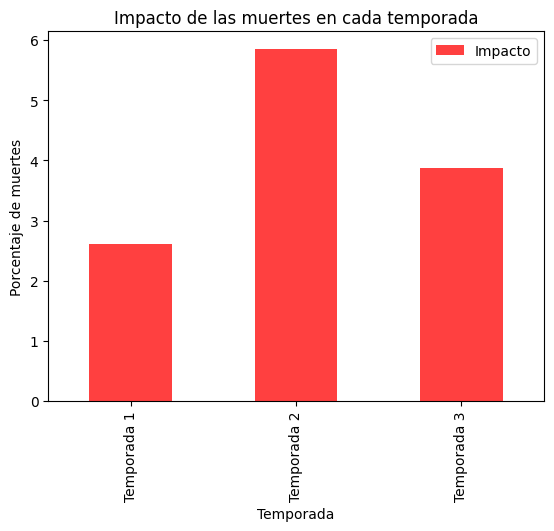

In [81]:
df_grafico=df_impacto.groupby('Temporada').sum()
df_grafico.plot(kind='bar',color='red',alpha=0.75)
plt.title('Impacto de las muertes en cada temporada')
plt.xlabel('Temporada')
plt.ylabel('Porcentaje de muertes')
plt.show()

In [82]:
grupo_season=df.groupby('season')['name']
grupo_season   


In [83]:
df_killer=df.groupby('killer')['death_no'].agg('count')
df_killer

killer
Accident            1
Aemon Targaryen     1
Alliser Thorne      3
Amory Lorch         1
Arthur Dayne        3
                   ..
Wildling giant      2
Wun Wun             3
Yara Greyjoy       11
Ygritte            14
Yoren               5
Name: death_no, Length: 129, dtype: int64

df_killer.head(10)

<Axes: ylabel='death_no'>

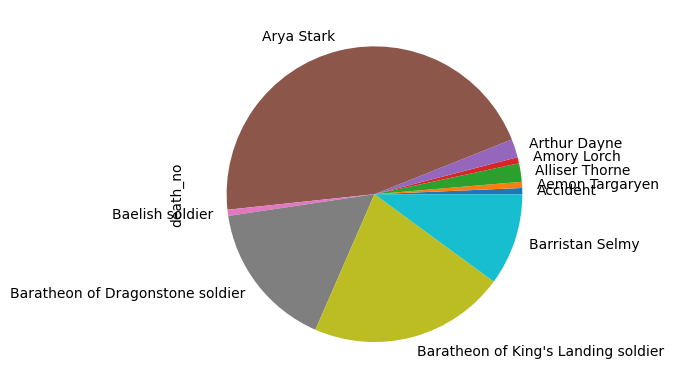

In [84]:
df_primeros=df_killer.head(10)
df_primeros.groupby('killer').sum().plot(kind='pie',y='count')

In [105]:
#dataframe muertes daenerys Targarien
df_daenerys=df[df.killer=='Daenerys Targaryen'].groupby('season')
df_daenerys

In [86]:
#muertes de daenerys por temporada
df_daenerys_season=df_daenerys.groupby('season')
df_daenerys_season.count() 

AttributeError: 'DataFrameGroupBy' object has no attribute 'groupby'